Inputs:
- Latitude/Longitude: 48.865, 9.314
- Dachneigung zur Straße: 48º, Bearing: 285º (WNW), Azimuth for PVGIS: +105º
- Dachneigung zum Garten: 42º, Bearing: 105º (OSO), Azimuth for PVGIS: -75º

Links:
- [Stromverbrauch Haushalt - DeStatis](https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Umwelt/UGR/private-haushalte/Tabellen/stromverbrauch-haushalte.html)
- [PVGis Hourly](https://re.jrc.ec.europa.eu/pvg_tools/en/#api_5.3)
- [Sample data](https://data.open-power-system-data.org/household_data/)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json


# Erzeugung

In [2]:
# load OSO data
path = "data\Timeseries_48.865_9.314_SA3_1kWp_crystSi_14_42deg_-75deg_2005_2023.json "
with open(path, "r") as file:
    data = json.load(file)

In [3]:
df_raw = pd.DataFrame(data['outputs']['hourly'])
df_raw["time"] = pd.to_datetime(df_raw.time.str.slice(0,4)+"-"\
                                +df_raw.time.str.slice(4,6)+"-"\
                                +df_raw.time.str.slice(6,8)+" "\
                                +df_raw.time.str.slice(9,11)+":"\
                                +df_raw.time.str.slice(11,13), utc=True)

df_raw = df_raw.set_index("time")
df_raw = df_raw.tz_convert("Europe/Berlin")
display(df_raw)

,P,Gb(i),Gd(i),Gr(i),H_sun,T2m,WS10m,Int
time,,,,,,,,
2005-01-01 01:10:00+01:00,0.0,0.0,0.0,0.0,0.0,4.25,3.17,0.0
2005-01-01 02:10:00+01:00,0.0,0.0,0.0,0.0,0.0,4.39,3.10,0.0
2005-01-01 03:10:00+01:00,0.0,0.0,0.0,0.0,0.0,4.48,2.97,0.0
2005-01-01 04:10:00+01:00,0.0,0.0,0.0,0.0,0.0,4.55,2.90,0.0
2005-01-01 05:10:00+01:00,0.0,0.0,0.0,0.0,0.0,4.48,2.83,0.0
...,...,...,...,...,...,...,...,...
2023-12-31 20:10:00+01:00,0.0,0.0,0.0,0.0,0.0,4.66,3.79,0.0
2023-12-31 21:10:00+01:00,0.0,0.0,0.0,0.0,0.0,4.38,3.79,0.0
2023-12-31 22:10:00+01:00,0.0,0.0,0.0,0.0,0.0,4.30,3.66,0.0


In [4]:
# load WNW data

path = "data\Timeseries_48.865_9.314_SA3_1kWp_crystSi_14_48deg_105deg_2005_2023.json"

with open(path, "r") as file:
    data2 = json.load(file)

In [ ]:
df_raw2 = pd.DataFrame(data2['outputs']['hourly'])
df_raw2["time"] = pd.to_datetime(df_raw2.time.str.slice(0,4)+"-"\
                                +df_raw2.time.str.slice(4,6)+"-"\
                                +df_raw2.time.str.slice(6,8)+" "\
                                +df_raw2.time.str.slice(9,11)+":"\
                                +df_raw2.time.str.slice(11,13), utc=True)

df_raw2 = df_raw2.set_index("time")
df_raw2 = df_raw2.tz_convert("Europe/Berlin")
display(df_raw2)

,P,Gb(i),Gd(i),Gr(i),H_sun,T2m,WS10m,Int
time,,,,,,,,
2005-01-01 01:10:00+01:00,0.0,0.0,0.0,0.0,0.0,4.25,3.17,0.0
2005-01-01 02:10:00+01:00,0.0,0.0,0.0,0.0,0.0,4.39,3.10,0.0
2005-01-01 03:10:00+01:00,0.0,0.0,0.0,0.0,0.0,4.48,2.97,0.0
2005-01-01 04:10:00+01:00,0.0,0.0,0.0,0.0,0.0,4.55,2.90,0.0
2005-01-01 05:10:00+01:00,0.0,0.0,0.0,0.0,0.0,4.48,2.83,0.0
...,...,...,...,...,...,...,...,...
2023-12-31 20:10:00+01:00,0.0,0.0,0.0,0.0,0.0,4.66,3.79,0.0
2023-12-31 21:10:00+01:00,0.0,0.0,0.0,0.0,0.0,4.38,3.79,0.0
2023-12-31 22:10:00+01:00,0.0,0.0,0.0,0.0,0.0,4.30,3.66,0.0


<Axes: xlabel='time'>

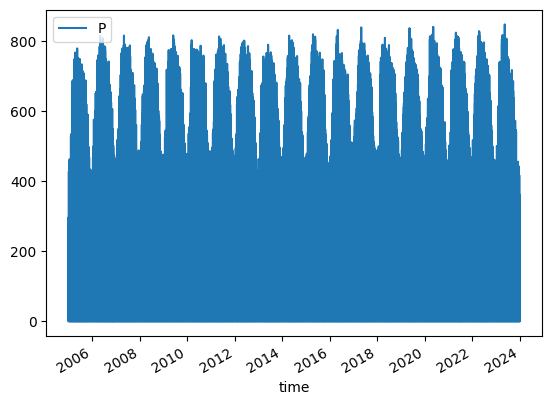

In [7]:
df_plot = df_raw.copy()
df_plot.plot(y='P')

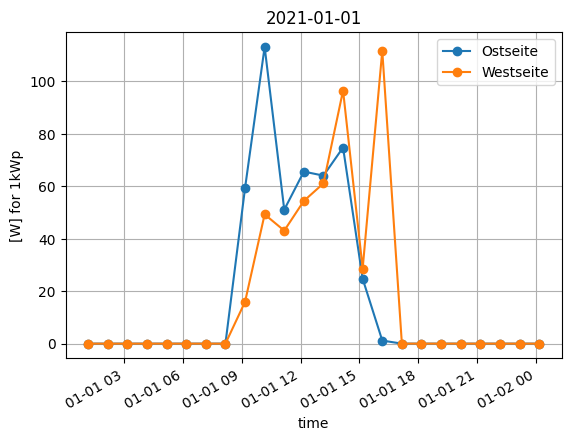

In [18]:
t_start = pd.to_datetime('2021-01-01 00:00:00', utc=True)
t_end = pd.to_datetime('2021-01-02 00:00:00', utc=True)
df_plot = df_raw[(df_raw.index >= t_start) & (df_raw.index <= t_end)].copy()
df_plot.plot(y='P', marker='o', linestyle='-', label="Ostseite")

df_plot2 = df_raw2[(df_raw2.index >= t_start) & (df_raw2.index <= t_end)].copy()
df_plot2.plot(y='P', marker='o', linestyle='-', ax=plt.gca(), label="Westseite")
plt.title(str(t_start)[0:str(t_start).find(" ")])
plt.ylabel('[W] for 1kWp')
plt.grid()

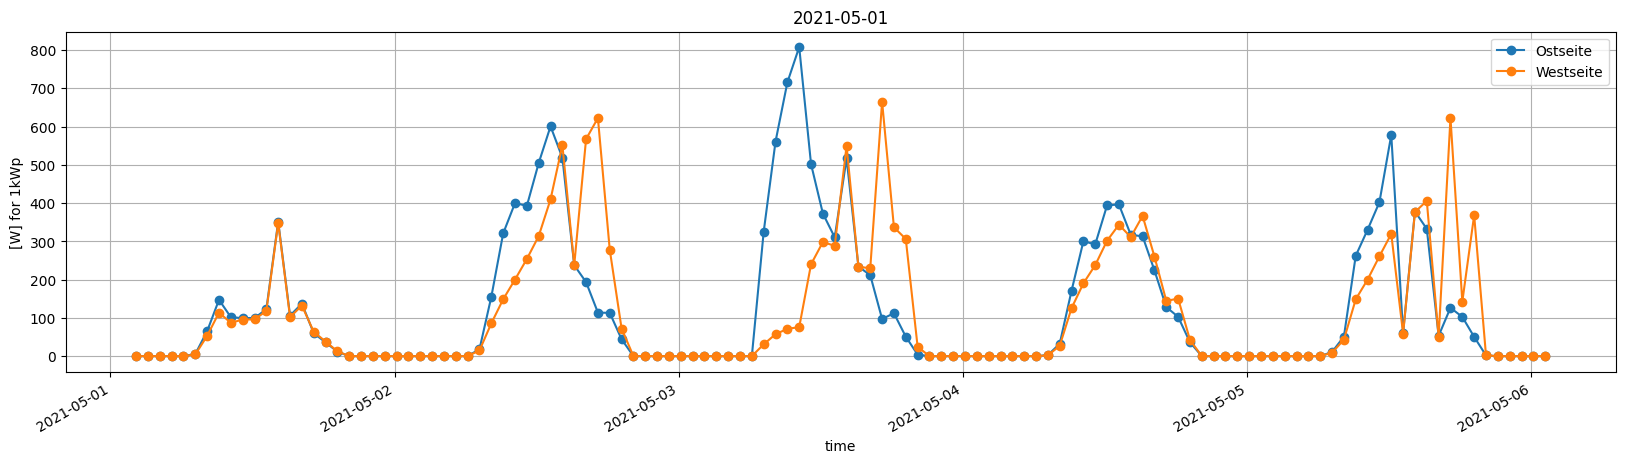

In [19]:
t_start = pd.to_datetime('2021-05-01 00:00:00', utc=True)
t_end = pd.to_datetime('2021-05-06 00:00:00', utc=True)
df_plot = df_raw[(df_raw.index >= t_start) & (df_raw.index <= t_end)].copy()
plt.figure(figsize=(20,5))
df_plot.plot(y='P', marker='o', linestyle='-', label="Ostseite", ax=plt.gca())

df_plot2 = df_raw2[(df_raw2.index >= t_start) & (df_raw2.index <= t_end)].copy()
df_plot2.plot(y='P', marker='o', linestyle='-', ax=plt.gca(), label="Westseite")
plt.title(str(t_start)[0:str(t_start).find(" ")])
plt.ylabel('[W] for 1kWp')
plt.grid()

Text(0, 0.5, '[W] for 1kWp')

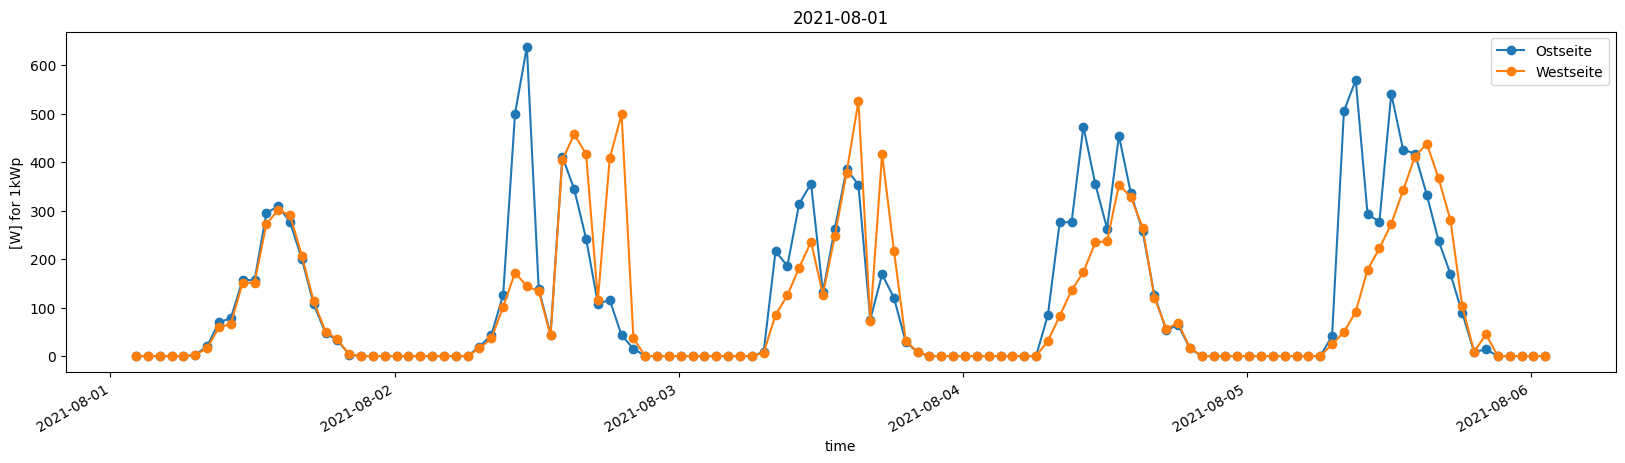

In [20]:
t_start = pd.to_datetime('2021-08-01 00:00:00', utc=True)
t_end = pd.to_datetime('2021-08-06 00:00:00', utc=True)
df_plot = df_raw[(df_raw.index >= t_start) & (df_raw.index <= t_end)].copy()
plt.figure(figsize=(20,5))
df_plot.plot(y='P', marker='o', linestyle='-', label="Ostseite", ax=plt.gca())

df_plot2 = df_raw2[(df_raw2.index >= t_start) & (df_raw2.index <= t_end)].copy()
df_plot2.plot(y='P', marker='o', linestyle='-', ax=plt.gca(), label="Westseite")
plt.title(str(t_start)[0:str(t_start).find(" ")])
plt.ylabel('[W] for 1kWp')

Text(0, 0.5, '[W] for 1kWp')

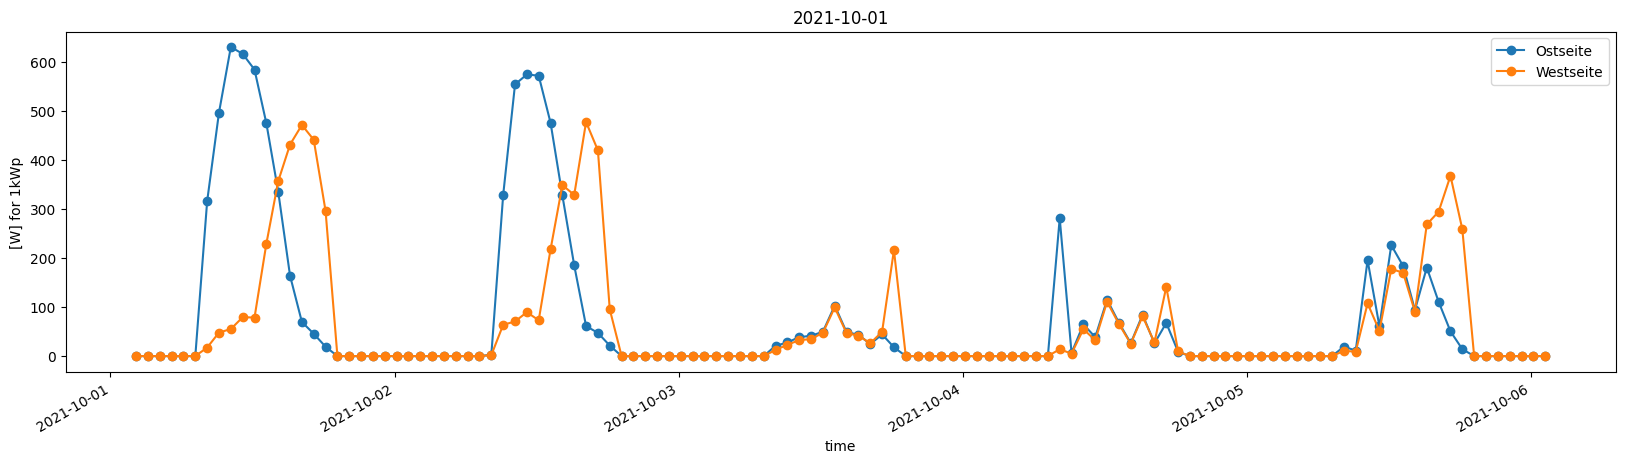

In [21]:
t_start = pd.to_datetime('2021-10-01 00:00:00', utc=True)
t_end = pd.to_datetime('2021-10-06 00:00:00', utc=True)
df_plot = df_raw[(df_raw.index >= t_start) & (df_raw.index <= t_end)].copy()
plt.figure(figsize=(20,5))
df_plot.plot(y='P', marker='o', linestyle='-', label="Ostseite", ax=plt.gca())

df_plot2 = df_raw2[(df_raw2.index >= t_start) & (df_raw2.index <= t_end)].copy()
df_plot2.plot(y='P', marker='o', linestyle='-', ax=plt.gca(), label="Westseite")
plt.title(str(t_start)[0:str(t_start).find(" ")])
plt.ylabel('[W] for 1kWp')

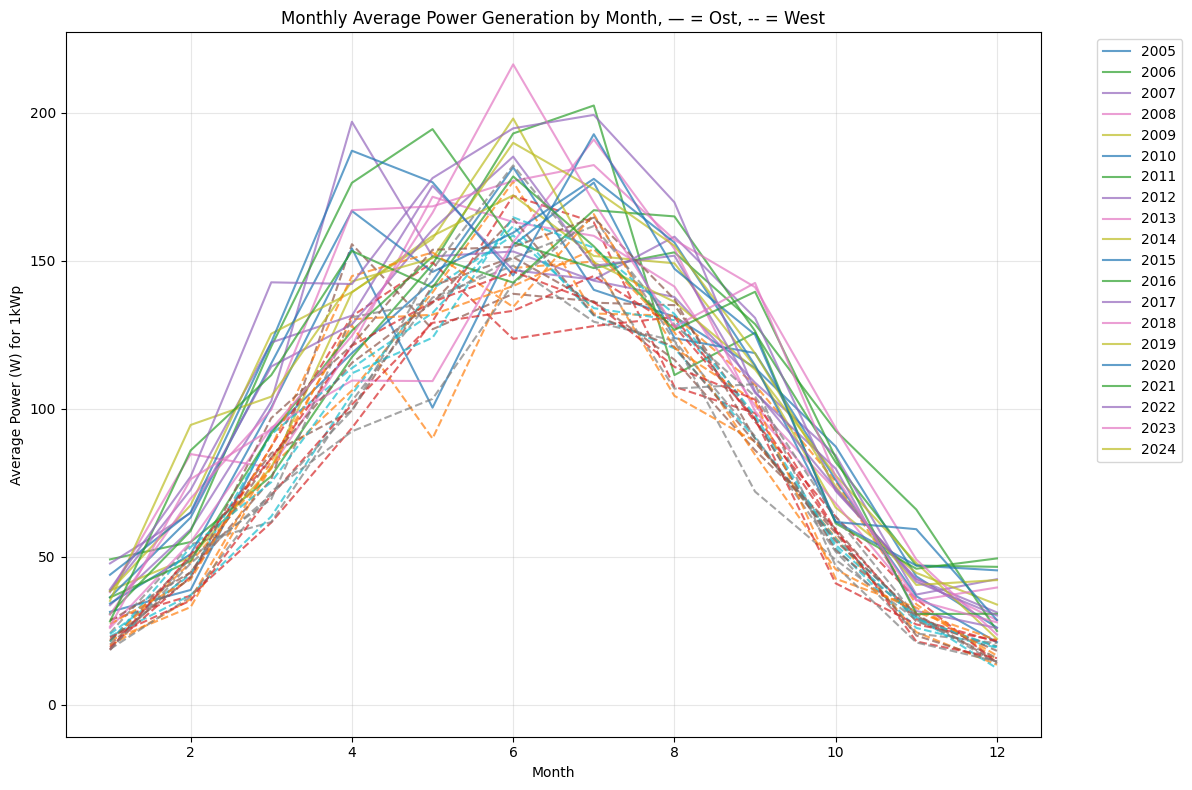

In [22]:

from scipy.ndimage import uniform_filter1d

# Create a dataframe with month and monthly averages
df_monthly = df_raw.copy()
df_monthly['year'] = df_monthly.index.year
df_monthly['month'] = df_monthly.index.month


df_monthly2 = df_raw2.copy()
df_monthly2['year'] = df_monthly2.index.year
df_monthly2['month'] = df_monthly2.index.month

# Group by year and month, calculate monthly average
df_monthly_avg = df_monthly.groupby(['year', 'month'])['P'].mean().reset_index()
df_monthly_avg2 = df_monthly2.groupby(['year', 'month'])['P'].mean().reset_index()

# Create the plot
plt.figure(figsize=(12, 8))
for year in df_monthly_avg['year'].unique():
    year_data = df_monthly_avg[df_monthly_avg['year'] == year]
    plt.plot(year_data['month'], year_data['P'], label=str(year), alpha=0.7)

    year_data2 = df_monthly_avg2[df_monthly_avg2['year'] == year]
    plt.plot(year_data2['month'], year_data2['P'], alpha=0.7, linestyle='--')

plt.xlabel('Month')
plt.ylabel('Average Power (W) for 1kWp')
plt.title('Monthly Average Power Generation by Month, — = Ost, -- = West')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

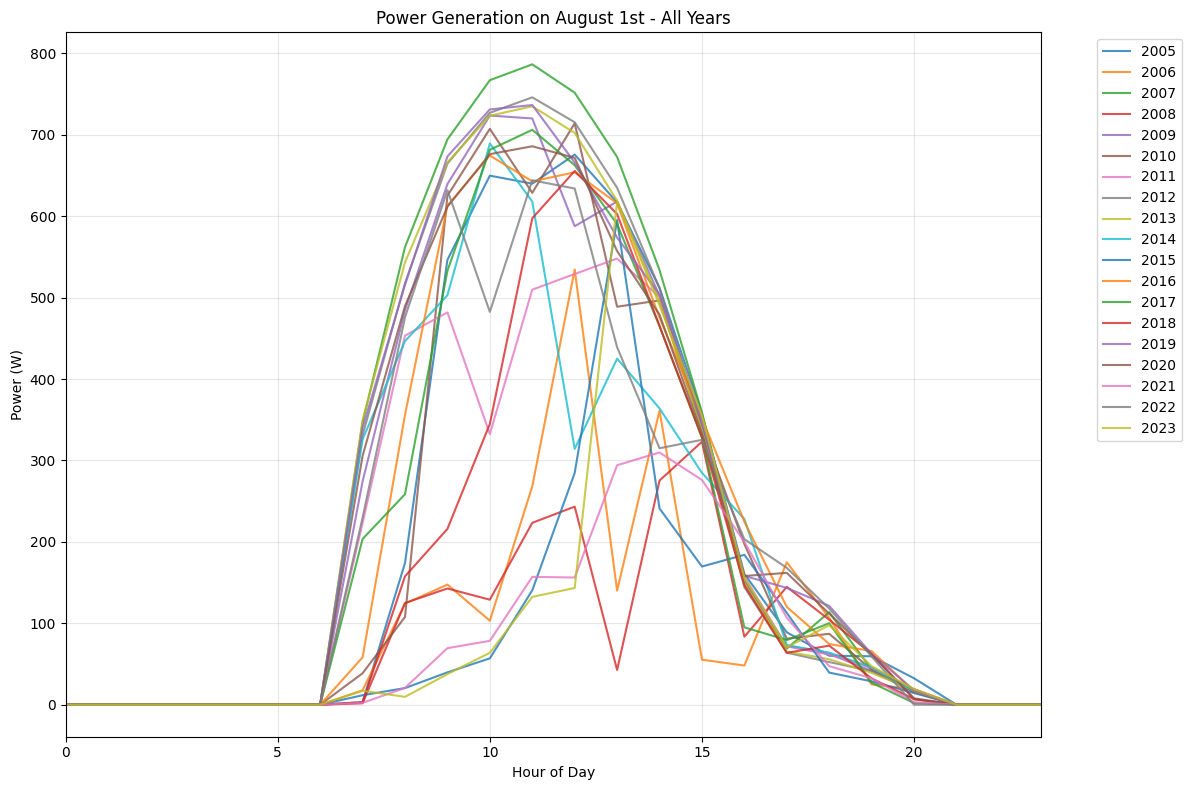

In [15]:
# Filter data for August 1st across all years
aug_1_data = df_raw[df_raw.index.strftime('%m-%d') == '08-01'].copy()
aug_1_data['year'] = aug_1_data.index.year

# Create hour column for x-axis
aug_1_data['hour'] = aug_1_data.index.hour

# Create the plot
plt.figure(figsize=(12, 8))
for year in aug_1_data['year'].unique():
    year_data = aug_1_data[aug_1_data['year'] == year]
    plt.plot(year_data['hour'], year_data['P'], label=str(year), alpha=0.8)

plt.xlabel('Hour of Day')
plt.ylabel('Power (W)')
plt.title('Power Generation on August 1st - All Years')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xlim(0, 23)
plt.tight_layout()
plt.show()

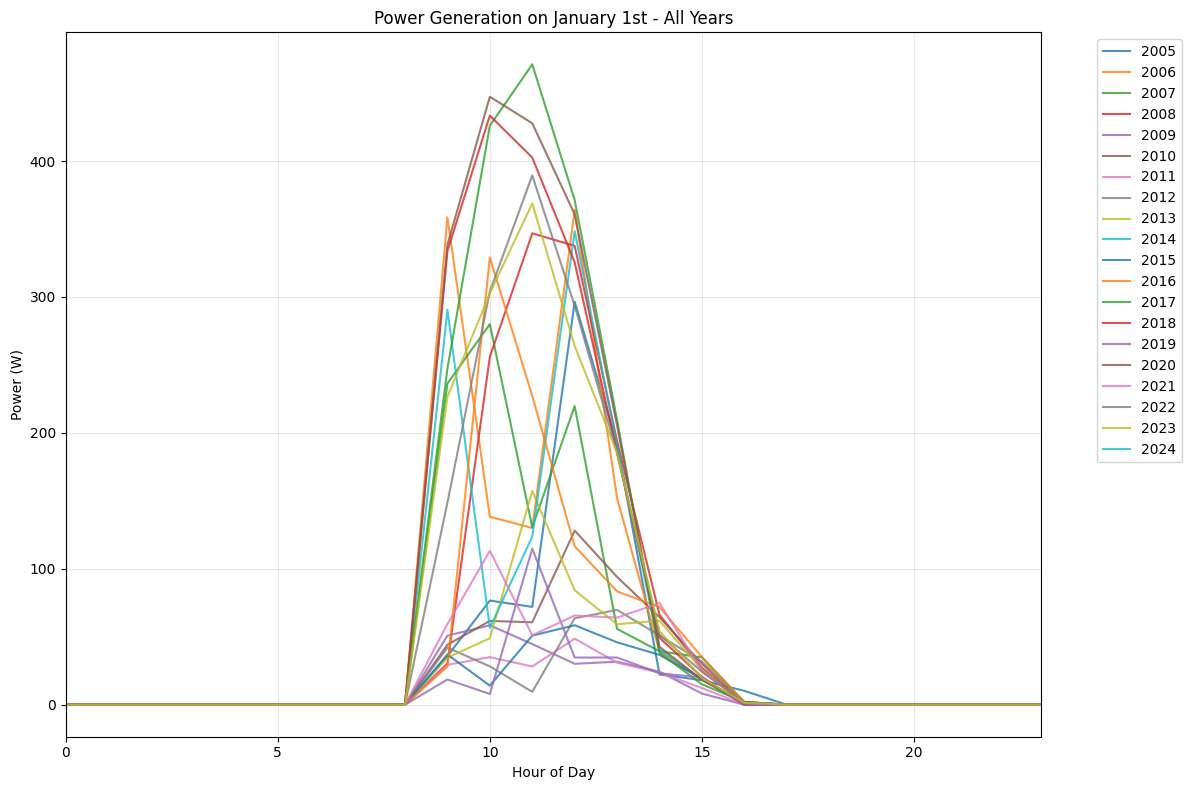

In [17]:
# Filter data for August 1st across all years
aug_1_data = df_raw[df_raw.index.strftime('%m-%d') == '01-01'].copy()
aug_1_data['year'] = aug_1_data.index.year

# Create hour column for x-axis
aug_1_data['hour'] = aug_1_data.index.hour

# Create the plot
plt.figure(figsize=(12, 8))
for year in aug_1_data['year'].unique():
    year_data = aug_1_data[aug_1_data['year'] == year]
    plt.plot(year_data['hour'], year_data['P'], label=str(year), alpha=0.8)

plt.xlabel('Hour of Day')
plt.ylabel('Power (W)')
plt.title('Power Generation on January 1st - All Years')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xlim(0, 23)
plt.tight_layout()
plt.show()